### Data Science Project — Individual Planning Report
**Jenny Gao Jia/ Project 009-1**

#### (1) Data Description

The project uses 2 datasets, players.csv and sessions.csv. Data is collected from a Minecraft research server run by UBC Computer Science research group. The data show how different players play the game and include basic information like age, gender, and total hours played. 

Dataset overview: 
| Dataset | # of Rows | # of Columns | Description | 
|----------|------------|--------------|--------------|
| **players.csv** | 196 | 7 | Contains one row per player with demographic information (age, gender, experience) and engagement level (total playtime, subscription). 
| **sessions.csv** | 1535 | 5 | Contains one row per gameplay session, including start and end times, as well as original start and end times. 


For players.csv data: 
| Variable | Description | Type |
|-----------|--------------|------|
| **experience** | Player’s skill level (Beginner, Amateur, Regular, Veteran, Pro) | Categorical |
| **subscribe** | Whether the player subscribed to the newsletter (TRUE/FALSE) | Binary |
| **hashedEmail** | Unique ID that links both datasets | ID |
| **played_hours** | Total hours the player spent in the game | Numeric |
| **name** | Player’s name | Text |
| **gender** | Gender of the player | Categorical |
| **Age** | Age of the player | Numeric |


For session.csv data:
| Variable | Description | Type |
|-----------|--------------|------|
| **hashedEmail** | Player ID (same as in players.csv) | ID |
| **start_time** | When the play session started | DateTime |
| **end_time** | When the play session ended | DateTime |
| **original_start_time** | Start time in numeric format | Numeric |
| **original_end_time** | End time in numeric format | Numeric |


**Notes:**
- Data are mostly complete, there are missing `Age` entries. 
- Some players recorded 0 total playtime, meaning they joined but didn't particpate.  
- The **subscribe** variable is unbalanced toward TRUE.  
- A few players show unusually high playtime values (>200 hrs), which can be outliers.

**(The summary statistics is calculated on the first part of section (3)!)**

#### (2)Questions

**Broad Question:**  
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question:**  
Can player activity features (such as total playtime, experience level, age) predict whether a player subscribes to the Minecraft research newsletter?

**Explanation:**  
The `players.csv` dataset contains information about each player, such as (`played_hours`), (`experience`), and (`gender`, `Age`).  
The response variable is `subscribe`, which shows if a player is subscribed to the newsletter or not (TRUE/FALSE).  

By comparing player characteristics between those who subscribed and those who did not, it shows which features relate most to engagement.

Later, I will use KNN classification to test which factors are the best predictors of subscription.

#### (3) Exploratory Data Analysis and Visualization

In [1]:
library(readr)
library(dplyr)
library(ggplot2)


players <- read_csv("players.csv", show_col_types = FALSE)
sessions <- read_csv("sessions.csv", show_col_types = FALSE)

head(players)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [2]:
players |>
  summarize(
    avg_age = round(mean(Age, na.rm = TRUE), 2),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    avg_played = round(mean(played_hours, na.rm = TRUE), 2),
    min_played = min(played_hours, na.rm = TRUE),
    max_played = max(played_hours, na.rm = TRUE)
  )

avg_age,min_age,max_age,avg_played,min_played,max_played
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,9,58,5.85,0,223.1


In [3]:
players |>
  count(subscribe)

subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


- Most players are subscribed, 144 out of 196. This means the target variable is unbalanced, since there are more subscribers than non-subscribers.

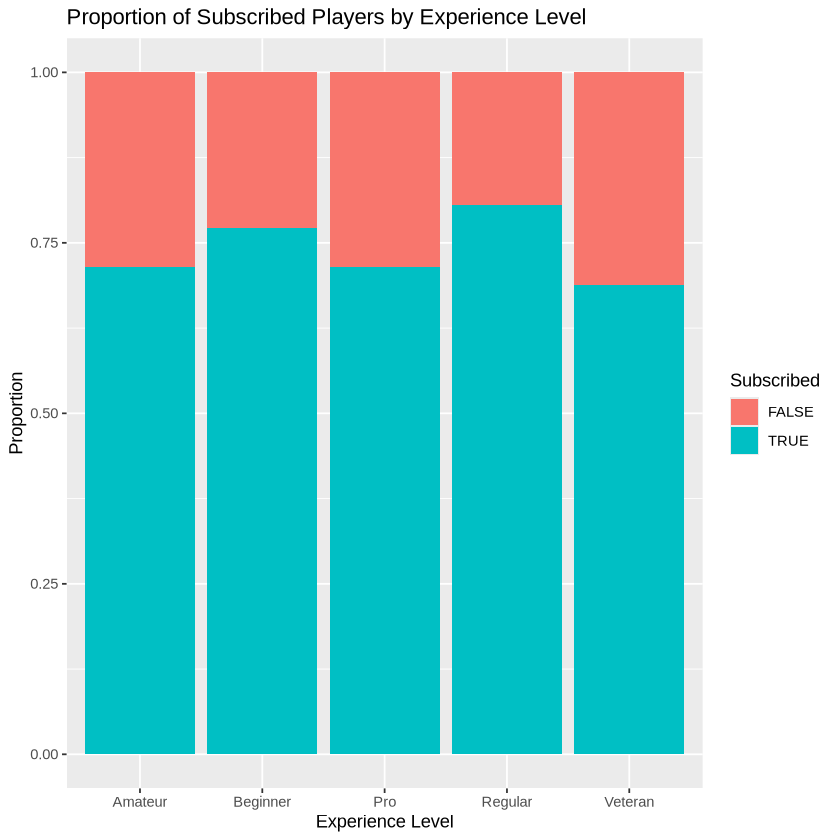

In [4]:
library(readr)
library(dplyr)
players <- read_csv("players.csv", show_col_types = FALSE)

ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Proportion of Subscribed Players by Experience Level",
    x = "Experience Level",
    y = "Proportion",
    fill = "Subscribed"
  )

- Regular players have the highest proportion of subscribers, suggesting that consistent players that play are the most engaged with the community.  
- Beginners are in second, showing that new players are likely curious or seeking more guidance and updates.  
- Pro and Amateur players show similar mid-level subscription rates.  
- Veteran players have the lowest subscription rate, probably because they already know the game well and feel less need to subscribe.

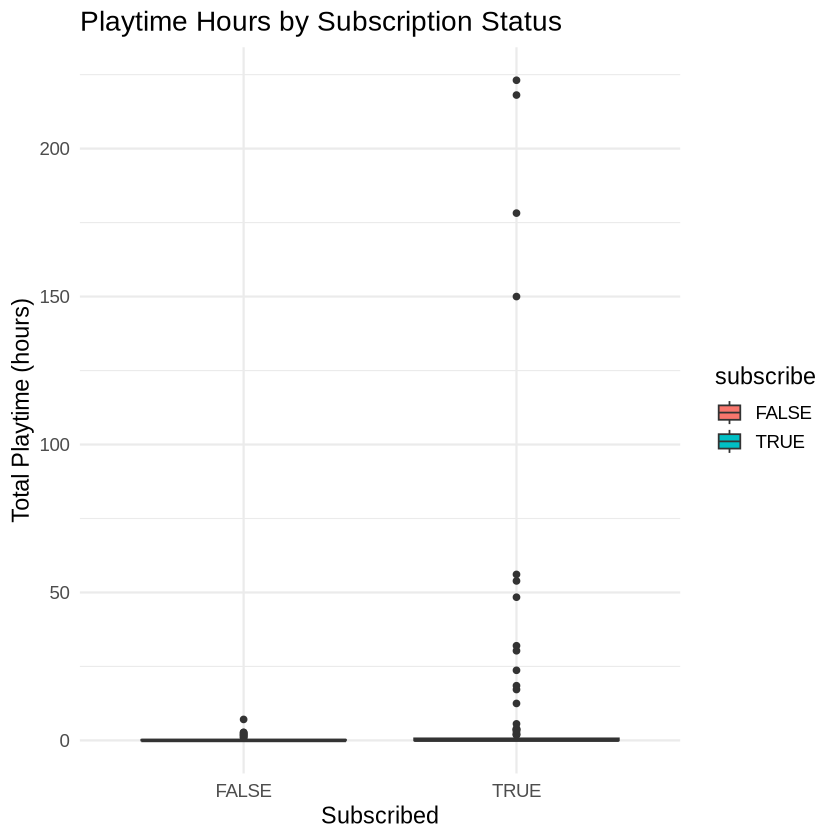

In [5]:
ggplot(players, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(
    title = "Playtime Hours by Subscription Status",
    x = "Subscribed",
    y = "Total Playtime (hours)"
  ) +
  theme_minimal(base_size = 14)

- The boxplot shows that players who subscribed to the newsletter usually have higher total playtime than those who did not subscribe. Most non-subscribers have very little playtime, but a few subscribers even played for more than 100 hours.
- This suggests that players who spend more time in the game are more engaged and more likely to subscribe.

#### (4) Methods & Plan

For this project, I plan to use a **K-Nearest Neighbors (KNN)** classification model to predict. 

**Why KNN?**  
- KNN is simple and easy to understand. It predicts a player's subscription status based on similarity to other players.  
- KNN does not assume any mathematical relationship between variables, it also works well with small datasets and can handle both numerical and categorical variables.

**Assumption& Potential limitations:**
- KNN assumes that similar players (neighbors) have similar outcomes.  
- All predictor variables must be scaled properly, variable with larger ranges can weight more in the calculation if not standardized.
- The model can also be affected by the choice of k, too small it may overfit, while too large may underfit.  

**Step 1: Split the data**
   - I will split the dataset into training (80%) and testing (20%) subsets.  

**Step 2: Scaling based on features:**  
   - All numeric features, such as `played_hours`, `Age` will be standardized or normalized to ensure fair distance calculations.

**Step 3: Cross-Validation:**  
   - I will be using 5 fold cross-validation on the training set to see how well the model performs on different parts of the data to find the best k-value.

**Step 4: Final Evaluation:** 
   - The final KNN model with optimal k-value will be tested to check its prediction accuracy and how frequently it can misclassify players. 

#### (5) GitHub Repository

**GitHub Repository Link:**  
[DSCI 100 Individual Planning Report Repository](https://github.com/thisisjennybyte/DSCI-100-Individual-Planning-Report)